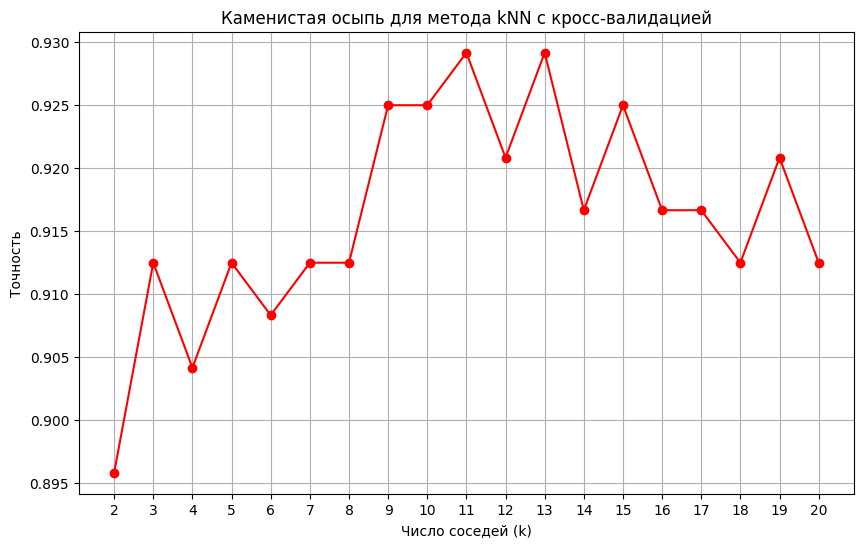

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('flame.txt', sep="\t", header=None)

X = data.iloc[:, :2]
y = data.iloc[:, 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

neighbors = range(2, 21)
cv_accuracy_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    cv_accuracy_scores.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(neighbors, cv_accuracy_scores, marker='o', linestyle='-', color='r')
plt.title('Каменистая осыпь для метода kNN с кросс-валидацией')
plt.xlabel('Число соседей (k)')
plt.ylabel('Точность')
plt.xticks(np.arange(min(neighbors), max(neighbors)+1, 1.0))
plt.grid(True)
plt.show()

In [2]:
knn_classifier_optimal = KNeighborsClassifier(n_neighbors=11)
knn_classifier_optimal.fit(X_train, y_train)
y_pred_optimal = knn_classifier_optimal.predict(X_test)
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
accuracy_optimal

0.9861111111111112

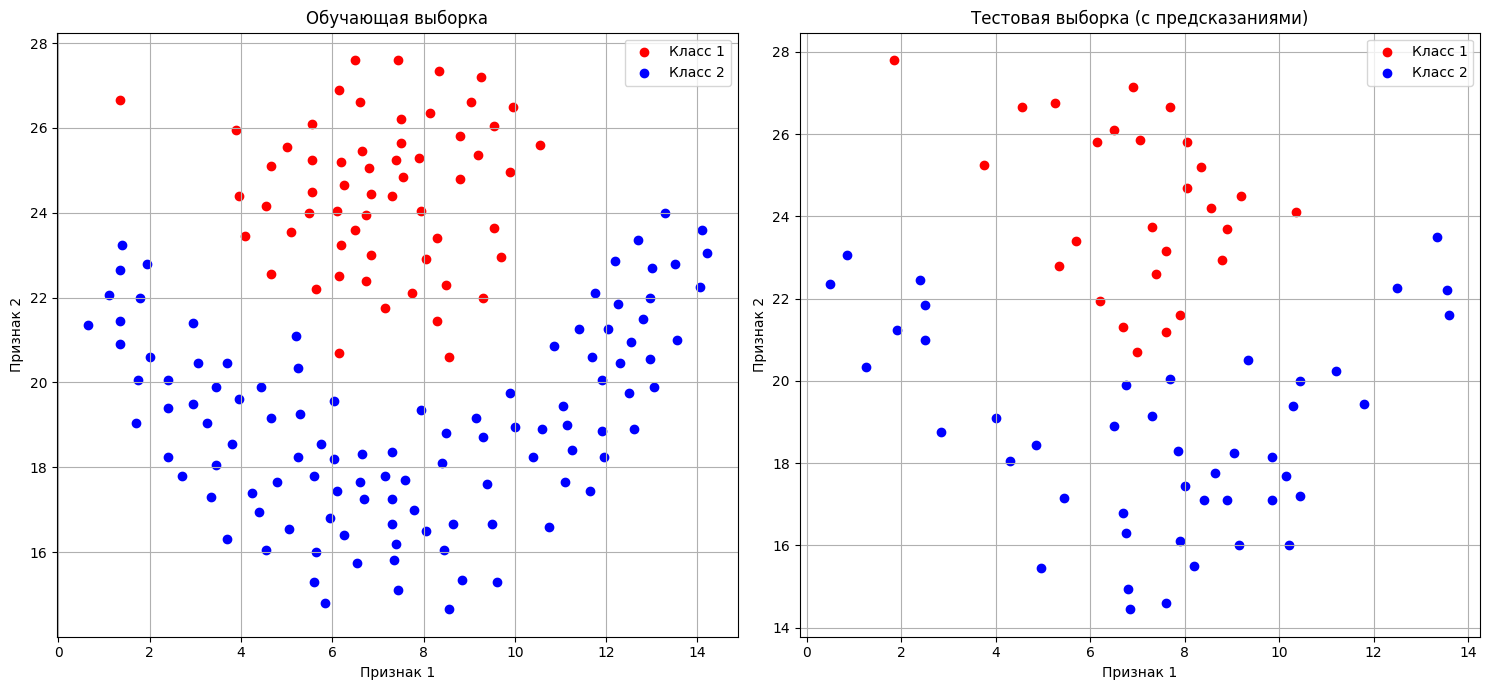

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].scatter(X_train[y_train == 1][0], X_train[y_train == 1][1], color='r', label='Класс 1')
ax[0].scatter(X_train[y_train == 2][0], X_train[y_train == 2][1], color='b', label='Класс 2')
ax[0].set_title('Обучающая выборка')
ax[0].set_xlabel('Признак 1')
ax[0].set_ylabel('Признак 2')
ax[0].legend()
ax[0].grid(True)


ax[1].scatter(X_test[y_pred_optimal == 1][0], X_test[y_pred_optimal == 1][1], color='r', label='Класс 1')
ax[1].scatter(X_test[y_pred_optimal == 2][0], X_test[y_pred_optimal == 2][1], color='b', label='Класс 2')
ax[1].set_title('Тестовая выборка (с предсказаниями)')
ax[1].set_xlabel('Признак 1')
ax[1].set_ylabel('Признак 2')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()

In [4]:
classification_report_y = classification_report(y_test, y_pred_optimal, target_names=['Класс 1', 'Класс 2'])
print(classification_report_y)

              precision    recall  f1-score   support

     Класс 1       1.00      0.96      0.98        28
     Класс 2       0.98      1.00      0.99        44

    accuracy                           0.99        72
   macro avg       0.99      0.98      0.99        72
weighted avg       0.99      0.99      0.99        72



Точность (Precision) для класса 1 составляет 1.00, а для класса 2 — 0.98, что указывает на очень высокую точность классификации для обоих классов.

Полнота (Recall) для класса 1 равна 0.96, а для класса 2 — 1.00, что означает, что почти все объекты класса 1 и все объекты класса 2 были правильно идентифицированы.

F1-мера (F1-score) составляет 0.98 для класса 1 и 0.99 для класса 2, что говорит о высоком качестве классификации для обоих классов.

Общая точность (Accuracy) классификации на тестовых данных составляет 0.99, что указывает на отличную производительность модели.


Эти результаты показывают, что классификатор kNN с k=11 и random seed 17 также показывает высокую эффективность, но с небольшим снижением точности по сравнению с random_seed, где все значения = 1.00. Это более реалистичный результат.

In [6]:
mse = mean_squared_error(y_test, y_pred_optimal)
mse

0.013888888888888888

Среднеквадратическая ошибка (MSE) для полученного результата классификации с random seed 17 составляет примерно 0.0139. 

Это указывает на небольшое количество ошибок в предсказаниях модели.